In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

loan = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan Prediction 3\\new_loan.csv")

In [2]:
X = loan.drop(['Loan_Status'], axis=1)
y = loan.Loan_Status

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_new,y, test_size=0.3,random_state=0)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score 
from sklearn.model_selection import cross_val_score

### Baseline Model

In [120]:
def fit_model(alg, predictors, labels):
    alg.fit(predictors,labels)
    cv_score = cross_val_score(alg,predictors,labels, cv=10, scoring='roc_auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(predictors)
    dtrain_predprob = alg.predict_proba(predictors)[:,1]

    print ("\nModel Report")
    print ("Accuracy : %.4g" % (accuracy_score(labels.values, dtrain_predictions)))
    print ("AUC Score (Train): %f" % (roc_auc_score(labels, dtrain_predprob)))

    print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    feature_names = predictors.columns
    feat_imp = pd.Series(alg.feature_importances_, feature_names)
    feat_imp = feat_imp.sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances', rot=70)
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8919
AUC Score (Train): 0.969253
CV Score : Mean - 0.7556058 | Std - 0.05590186 | Min - 0.6733746 | Max - 0.8916409


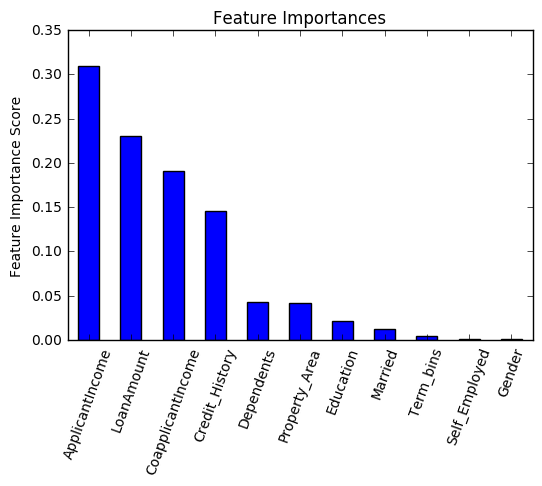

In [121]:
predictors = X
labels = y
gbm = GradientBoostingClassifier(random_state=10)
fit_model(gbm, predictors, labels)

### Parameter Tuning

In [126]:
#1. n_estimators
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=20,min_samples_leaf=10,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch1.fit(X, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.74644, std: 0.07007, params: {'n_estimators': 20},
  mean: 0.74846, std: 0.06391, params: {'n_estimators': 30},
  mean: 0.74768, std: 0.06544, params: {'n_estimators': 40},
  mean: 0.74372, std: 0.07082, params: {'n_estimators': 50},
  mean: 0.74456, std: 0.07166, params: {'n_estimators': 60},
  mean: 0.74785, std: 0.06969, params: {'n_estimators': 70},
  mean: 0.74432, std: 0.07133, params: {'n_estimators': 80}],
 {'n_estimators': 30},
 0.7484590687377064)

In [127]:
from sklearn.model_selection import GridSearchCV
param_test1_1 = {'n_estimators':range(20,81,10)}
gsearch1_1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=20,min_samples_leaf=10,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1_1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch1_1.fit(X, y)
gsearch1_1.grid_scores_, gsearch1_1.best_params_, gsearch1_1.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.73503, std: 0.07333, params: {'n_estimators': 20},
  mean: 0.74475, std: 0.07179, params: {'n_estimators': 30},
  mean: 0.74911, std: 0.07185, params: {'n_estimators': 40},
  mean: 0.75021, std: 0.07175, params: {'n_estimators': 50},
  mean: 0.74718, std: 0.07766, params: {'n_estimators': 60},
  mean: 0.74911, std: 0.07394, params: {'n_estimators': 70},
  mean: 0.74766, std: 0.07531, params: {'n_estimators': 80}],
 {'n_estimators': 50},
 0.75021477776895718)

In [130]:
param_test2 = {'max_depth':range(1,16,1), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.76552, std: 0.03710, params: {'min_samples_split': 200, 'max_depth': 1},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 400, 'max_depth': 1},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 600, 'max_depth': 1},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 800, 'max_depth': 1},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 1000, 'max_depth': 1},
  mean: 0.75742, std: 0.03664, params: {'min_samples_split': 200, 'max_depth': 2},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 400, 'max_depth': 2},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 600, 'max_depth': 2},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 800, 'max_depth': 2},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 1000, 'max_depth': 2},
  mean: 0.75904, std: 0.04267, params: {'min_samples_split': 200, 'max_depth': 3},
  mean: 0.50000, std: 0.00000, params: {'min_samples_split': 400, 'max_depth': 3},
  


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.864690
CV Score : Mean - 0.7550684 | Std - 0.05914236 | Min - 0.6656347 | Max - 0.8823529


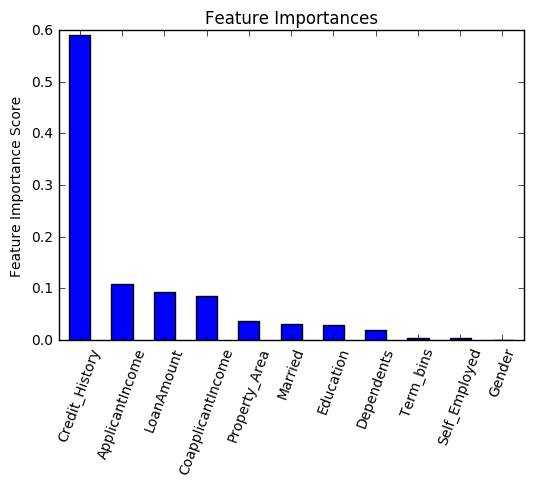

In [131]:
fit_model(gsearch2.best_estimator_, X, y)

In [133]:
param_test3 = {'min_samples_split':range(10,210,20), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, max_features='sqrt', subsample=0.8,max_depth= 4, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.78000, std: 0.03709, params: {'min_samples_split': 10, 'min_samples_leaf': 30},
  mean: 0.78000, std: 0.03709, params: {'min_samples_split': 30, 'min_samples_leaf': 30},
  mean: 0.78000, std: 0.03709, params: {'min_samples_split': 50, 'min_samples_leaf': 30},
  mean: 0.77789, std: 0.03259, params: {'min_samples_split': 70, 'min_samples_leaf': 30},
  mean: 0.78127, std: 0.03508, params: {'min_samples_split': 90, 'min_samples_leaf': 30},
  mean: 0.77823, std: 0.03029, params: {'min_samples_split': 110, 'min_samples_leaf': 30},
  mean: 0.77737, std: 0.04198, params: {'min_samples_split': 130, 'min_samples_leaf': 30},
  mean: 0.78013, std: 0.04163, params: {'min_samples_split': 150, 'min_samples_leaf': 30},
  mean: 0.77315, std: 0.04432, params: {'min_samples_split': 170, 'min_samples_leaf': 30},
  mean: 0.77608, std: 0.04823, params: {'min_samples_split': 190, 'min_samples_leaf': 30},
  mean: 0.77995, std: 0.03528, params: {'min_samples_split': 10, 'min_samples_leaf': 40},
  mea


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.852491
CV Score : Mean - 0.7720566 | Std - 0.05792812 | Min - 0.6842105 | Max - 0.8900929


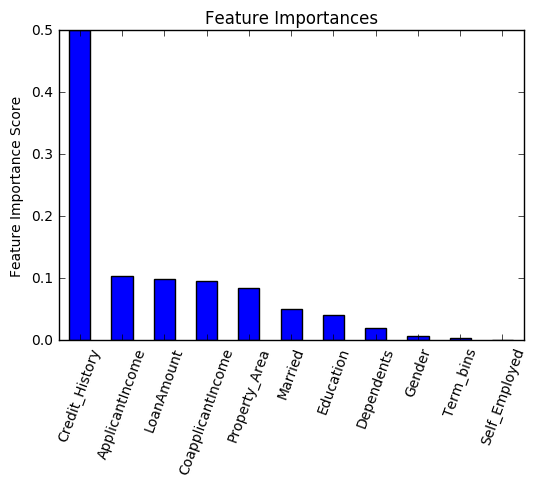

In [134]:
fit_model(gsearch3.best_estimator_, X, y)

In [137]:
param_test4 = {'max_features':range(1,6,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, subsample=0.8,max_depth= 4,min_samples_leaf= 40, min_samples_split= 170, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.77311, std: 0.04115, params: {'max_features': 1},
  mean: 0.78043, std: 0.03543, params: {'max_features': 2},
  mean: 0.78308, std: 0.04736, params: {'max_features': 3},
  mean: 0.76889, std: 0.04746, params: {'max_features': 4},
  mean: 0.77230, std: 0.04603, params: {'max_features': 5}],
 {'max_features': 3},
 0.78308043791679349)


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.852491
CV Score : Mean - 0.7720566 | Std - 0.05792812 | Min - 0.6842105 | Max - 0.8900929


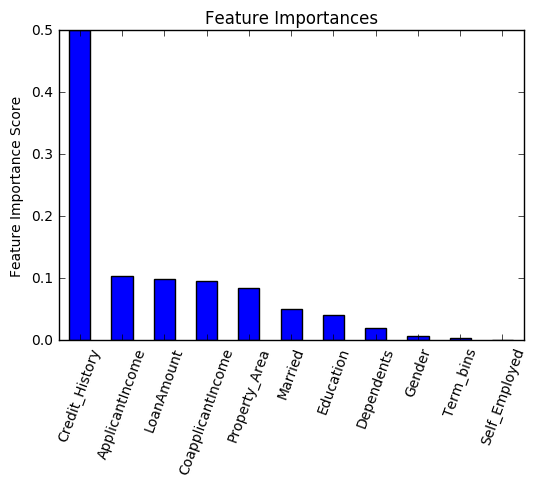

In [138]:
fit_model(gsearch4.best_estimator_, X, y)

In [141]:
# Tuning subsample and making models with lower learning rate
param_test5 = {'subsample':[0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=50,max_features=3, max_depth= 4,min_samples_leaf= 40, min_samples_split= 170, random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

C:\Users\DHRUBAJIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.77796, std: 0.04753, params: {'subsample': 0.7},
  mean: 0.78516, std: 0.04683, params: {'subsample': 0.75},
  mean: 0.78308, std: 0.04736, params: {'subsample': 0.8},
  mean: 0.78014, std: 0.05099, params: {'subsample': 0.85},
  mean: 0.77646, std: 0.04495, params: {'subsample': 0.9}],
 {'subsample': 0.75},
 0.78516496550773418)


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.871619
CV Score : Mean - 0.7708328 | Std - 0.06912776 | Min - 0.6659125 | Max - 0.9086687


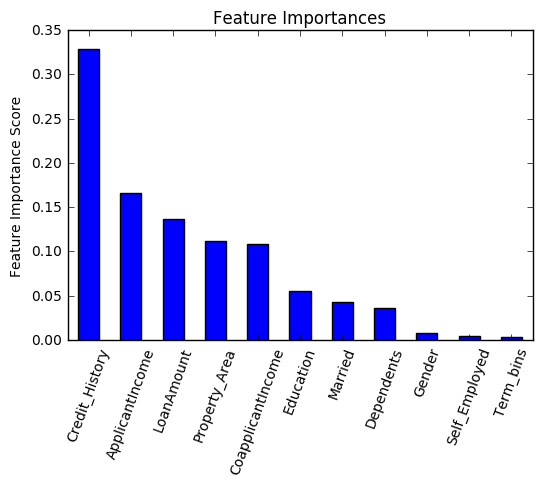

In [150]:
#Lets decrease the learning rate to half, i.e. 0.05 with twice (100) the number of trees.
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_features=3, max_depth= 4,min_samples_leaf= 40, min_samples_split= 170,subsample=0.75 ,random_state=10)
fit_model(gbm_tuned_1, X, y)


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.852202
CV Score : Mean - 0.7713607 | Std - 0.06766 | Min - 0.6704374 | Max - 0.8993808


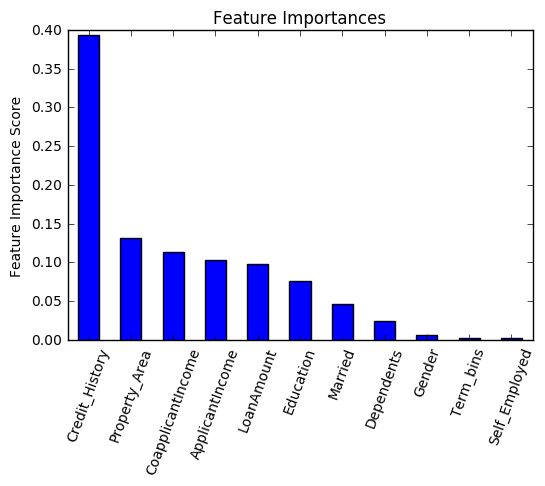

In [151]:
#Now lets reduce to one-tenth of the original value, i.e. 0.01 for 50 trees.
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.025, n_estimators=100,max_features=3, max_depth= 4,min_samples_leaf= 40, min_samples_split= 170,subsample=0.75 ,random_state=10)
fit_model(gbm_tuned_2, X, y)


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.875426
CV Score : Mean - 0.7718429 | Std - 0.06858819 | Min - 0.6625387 | Max - 0.9148607


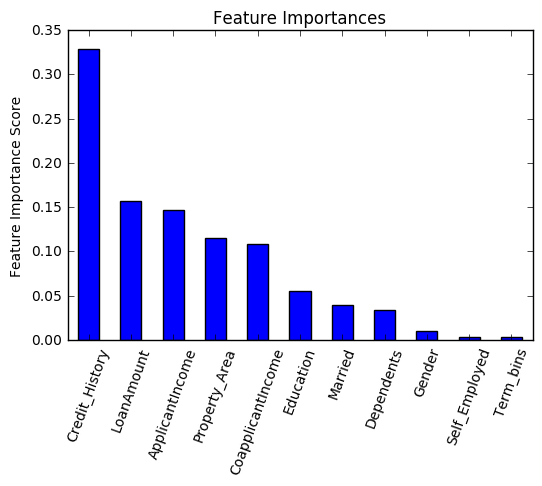

In [155]:
#Here we see that the score reduced very slightly. So lets run for 500 trees
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,max_features=3, max_depth= 4,min_samples_leaf= 40, min_samples_split= 170,subsample=0.75 ,random_state=10)
fit_model(gbm_tuned_3, X, y)


Model Report
Accuracy : 0.8198
AUC Score (Train): 0.861134
CV Score : Mean - 0.7750759 | Std - 0.06818042 | Min - 0.6857585 | Max - 0.9210526


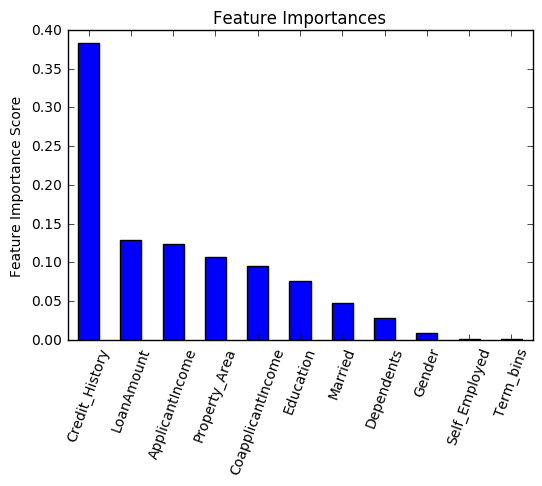

In [160]:
# using warm_start parameter
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,max_features=3, max_depth= 4,min_samples_leaf= 40, min_samples_split= 170,subsample=0.75,warm_start=True,random_state=10)
fit_model(gbm_tuned_4, X, y)

### Prediction on Test Data

In [162]:
test = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan Prediction 3\\new_test.csv")

In [163]:
idd = test.Loan_ID
test = test.drop(['Loan_ID'], axis=1)

In [164]:
test = sc.fit_transform(test)

In [166]:
test_pred = gbm_tuned_4.predict(new_test)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 5 

In [180]:
submission = pd.DataFrame({'Loan_ID': idd, 'Loan_Status':test_pred})
sub_checker = {0:'N',1:'Y'}
submission['Loan_Status'] = submission['Loan_Status'].map(sub_checker)

In [181]:
submission.to_csv("gb3.csv", index=False)